In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import math
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 80)


In [ ]:
dados = pd.read_excel('Acoes.xlsx')

In [ ]:
dados = dados.dropna()
dados

,TICKER,Setor,SubSetor,Segmento,PREÇO,Cotação Máxima 12 meses,Queda do Máximo,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA
0,VALE3,Materiais Básicos,Mineração,Minerais Metálicos,69.61,96.18,-0.276253,0.032735,1.791470,0.752220,53.150249,0.4370,41.78,3.10,3.325602,0.225602,0.15,1.35,16.261799,-0.930377,1.32,55.74,23.46,34.13,0.42,0.56,0.56,25.41,50.75,2.085915e+09,38.91
1,PETR4,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",22.84,30.20,-0.243709,0.040388,0.723255,0.297413,34.398568,0.5042,28.42,1.54,1.514105,-0.095895,0.44,0.78,5.556224,-0.385286,1.31,39.35,16.08,30.90,0.41,0.59,0.57,9.88,0.00,1.910182e+09,31.47
2,ITUB4,Financeiro,Intermediários Financeiros,Bancos,24.86,30.37,-0.181429,0.080678,1.596801,0.114803,63.872040,0.1970,12.75,5.45,5.260050,0.220050,0.00,1.07,0.000000,-0.125239,0.00,18.14,1.34,0.00,0.07,0.92,0.11,2.26,5.09,6.100786e+08,15.59
3,BBDC4,Financeiro,Intermediários Financeiros,Bancos,13.59,20.79,-0.346320,0.106729,0.943857,0.084410,30.633134,0.2247,17.82,6.49,4.542789,-1.377211,0.00,1.46,1.580768,-0.092084,5.37,15.00,1.36,0.00,0.09,0.91,0.08,-5.09,5.20,4.795929e+08,14.43
4,B3SA3,Financeiro,Serviços Financeiros Diversos,Serviços Financeiros Diversos,11.54,15.75,-0.267302,0.135672,3.231627,1.386506,95.754270,0.5911,44.83,10.97,10.772089,-0.177911,-0.23,6.48,8.884307,-2.271738,1.67,20.92,8.99,11.60,0.43,0.57,0.20,34.69,25.83,4.249824e+08,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,MSPA4,Materiais Básicos,Madeira e Papel,Papel e Celulose,41.00,46.50,-0.118280,-0.117951,0.317419,0.185161,25.305376,-0.1452,-17.41,-12.47,-14.574839,-1.274839,0.09,1.81,4.946452,-0.202796,1.69,-3.48,-1.99,-2.60,0.57,0.43,0.11,-22.81,0.00,1.395000e+04,128.31
432,ESTR3,Consumo Cíclico,Viagens e Lazer,Brinquedos e Jogos,40.00,40.00,0.000000,-0.001913,-0.067416,0.112360,88.719101,0.0799,-21.42,1.14,19.370787,16.720787,0.00,0.09,-0.067416,-0.269663,0.22,-6.59,-12.34,-1.81,-1.87,2.87,0.58,4.90,0.00,0.000000e+00,-634.97
433,EQPA6,Utilidade Pública,Energia Elétrica,Energia Elétrica,10.69,9.83,0.087487,0.186562,6.426240,1.958473,30.856155,0.2179,14.39,12.56,7.517681,1.487681,0.67,2.74,12.475067,-3.151918,1.71,33.08,10.08,19.70,0.30,0.70,0.70,12.16,28.18,0.000000e+00,1.66
434,CORR4,Financeiro,Exploração de Imóveis,Exploração de Imóveis,82.00,1.06,76.358491,-0.021800,-9.310000,0.090000,96.320000,-0.6077,-32.94,-1.18,7.970000,8.770000,0.00,0.72,0.120000,-0.460000,31.90,-425.98,-4.19,981.86,-0.01,1.01,0.13,-18.56,0.00,0.000000e+00,-8.81


In [ ]:
dados['Info'] = dados['Dados concatenados'] = dados['PREÇO'].round(2).astype(str) + ' ' + dados['MARGEM BRUTA'].round(2).astype(str) + ' ' + dados['MARG. LIQUIDA'].round(2).astype(str) + ' ' + dados['LIQUIDEZ MEDIA DIARIA'].round(2).astype(str)
dados['Info']

0          69.61 0.44 3.1 38.91
1          22.84 0.5 1.54 31.47
2          24.86 0.2 5.45 15.59
3         13.59 0.22 6.49 14.43
4         11.54 0.59 10.97 3.58
                 ...           
431    41.0 -0.15 -12.47 128.31
432      40.0 0.08 1.14 -634.97
433       10.69 0.22 12.56 1.66
434      82.0 -0.61 -1.18 -8.81
435       10.45 0.21 49.93 1.98
Name: Info, Length: 436, dtype: object

In [ ]:
# selecionar as colunas relevantes para comparação
dados_selecionados = dados['Info']
dados_selecionados


0          69.61 0.44 3.1 38.91
1          22.84 0.5 1.54 31.47
2          24.86 0.2 5.45 15.59
3         13.59 0.22 6.49 14.43
4         11.54 0.59 10.97 3.58
                 ...           
431    41.0 -0.15 -12.47 128.31
432      40.0 0.08 1.14 -634.97
433       10.69 0.22 12.56 1.66
434      82.0 -0.61 -1.18 -8.81
435       10.45 0.21 49.93 1.98
Name: Info, Length: 436, dtype: object

In [ ]:
# criar o vetorizador TF-IDF
vetorizador = TfidfVectorizer()

# vetorizar as descrições dos produtos
vetores = vetorizador.fit_transform(dados_selecionados)
for i in vetores:
  print(i)

  (0, 119)	0.44461814808819566
  (0, 58)	0.4288564127803777
  (0, 65)	0.4630942331686446
  (0, 82)	0.4774505536953834
  (0, 94)	0.4195015847284563
  (0, 68)	0.4313797799445089
  (0, 48)	0.4563106749900521
  (0, 75)	0.4884521888834135
  (0, 111)	0.4884521888834135
  (0, 35)	0.35849821714362
  (0, 80)	0.47812501481869846
  (0, 21)	0.35893974163177883
  (0, 66)	0.4543343794377863
  (0, 114)	0.5173397850884358
  (0, 37)	0.41048574945722976
  (0, 63)	0.5235603070801631
  (0, 20)	0.309917136757278
  (0, 70)	0.43270673323404274
  (0, 19)	0.3418531593879223
  (0, 80)	0.4553648647405676
  (0, 35)	0.34406411260769326
  (0, 79)	0.4601512748533697
  (0, 125)	0.44556694011334663
  (0, 9)	0.3336002391505552
  (0, 13)	0.3042806940200205
  (0, 80)	0.43281075274565933
  (0, 75)	0.44556694011334663
  (0, 88)	0.47879467394864433
  (0, 103)	0.4525000414921505
  (0, 89)	0.6400955220458325
  (0, 52)	0.3953189791862851
  (0, 90)	0.4692066343368374
  (0, 38)	0.39129639324258725
  (0, 88)	0.5127226476834522
  

In [ ]:
# exemplo de setores fornecidos pelo investidor
#setor_investimento = input('Digite o setor que deseja verificar a similaridade: ').split()
setor_investimento = 'ALPA4'

In [ ]:
matriz = cosine_similarity(vetores)

In [ ]:
m = pd.DataFrame(matriz, columns=dados['TICKER'], index=dados['TICKER'])


In [ ]:
similar = m[setor_investimento].sort_values(ascending=0).head(11)

In [ ]:
similar = m[setor_investimento].sort_values(ascending=0).head(11)

# Cria um DataFrame com a coluna de similaridade
df = pd.DataFrame({setor_investimento: similar})

# Adiciona uma coluna com o ângulo de inclinação da similaridade do cosseno
df['Angulo'] = np.arccos(df[setor_investimento]) * (180/np.pi)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


<BarContainer object of 10 artists>

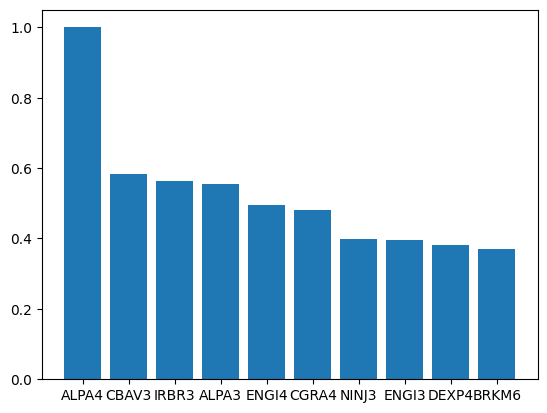

In [ ]:
plt.bar(df.index, df[setor_investimento])